This script trains a simple Multi-Layer Perceptron (MLP) on the CIFAR-10 dataset.

In [1]:
# import necessary torch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import random

# import MLP model
from MLP_architecture import MLP

# seed values
seed = 42  # or any number you prefer
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

## Data preprocessing and loading

In [ ]:
# transform the data to tensor and normalize it
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

num_workers = 4
# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=num_workers, prefetch_factor=8, persistent_workers=True)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=num_workers, prefetch_factor=8, persistent_workers=True)

## Load the model

In [3]:
# Model loading and other boilerplate code required to train the model
model = MLP()

# Loss function and optimizer (PyTorch object initialization)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training





In [4]:
# Helper functions to train model and visualise loss and accuracy
def reset_model(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

def training(model, loss_func, optimizer, trainloader, testloader, epochs=10):
    # By default training continues from where it was left
    reset_model(model)

    # Training loop with tracking of training error and accuracy
    train_losses = []
    validation_loss = []
    validation_accuracy = []
    train_accuracies = []

    for epoch in range(epochs):
        # running variables in an iteration of epoch
        running_loss = 0.0
        correct = 0
        total = 0

        # iterate over the mini-batches
        for i, (inputs, labels) in enumerate(trainloader):
            # zero the parameter gradients (by default, gradients are accumulated)
            optimizer.zero_grad()

            # forward pass
            outputs = model(inputs)
            # calculate loss
            loss = loss_func(outputs, labels)
            running_loss += loss.item()

            # backward pass
            loss.backward()

            # update weights and biases
            optimizer.step()

            # Calculate accuracy
            '''
                # To Calculate accuracy
                    - outputs: shape is (batch_size, num_classes), containing raw scores (logits) for each class.
                    - labels: shape is (batch_size), containing the correct label for each sample.
                    - predicted: shape is (batch_size), containing the predicted label for each sample.
                    - correct: number of correctly classified samples.
            '''
            _, predicted = torch.max(outputs, dim=1)    # along the columns (dim=1)
            correct += (predicted == labels).sum().item()   # item() to get the value of tensor
            total += labels.size(0) #  total batches size.

        # averaged over every epoch to smooth out the noise due to the mini batch (variance).
        avg_loss = running_loss / total  # average loss per mini batch over an epoch.
        accuracy = 100 * correct / total
        # print(f"Epoch {epoch + 1}, @ Batch {(i + 1)}, Avg Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%")

        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)

        # test set loss (validation set loss) after every epoch
        validation_error = 0.0
        total_test = 0.0
        correct_test = 0.0
        for i, (inputs_test, labels_test) in enumerate(testloader):
            outputs_test = model(inputs_test)
            loss_test = loss_func(outputs_test, labels_test)
            validation_error += loss_test.item()
            total_test += labels_test.size(0)  

            _, predicted_test = torch.max(outputs_test, dim=1)    # along the columns (dim=1)
            correct_test += (predicted_test == labels_test).sum().item()

        validation_loss.append(validation_error/total_test)
        validation_accuracy.append(100 * correct_test/total_test)
        running_loss = 0.0

    print("Finished Training")

    return train_losses, train_accuracies, validation_loss, validation_accuracy

def plot_training_loss_and_accuracy(train_loss, train_acc, valid_loss, valid_acc):
    import matplotlib.pyplot as plt

    # Plotting the loss and accuracy curves during training
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    # Plot on the first subplot
    axes[0].grid(True, alpha=0.35, linestyle='-.', color='black', linewidth=0.75)
    axes[0].plot(range(1,len(train_loss)+1), train_loss, color='red', linestyle='-', linewidth=1, marker='.', label = 'Training loss')
    axes[0].plot(range(1, len(valid_loss)+1), valid_loss,  color='green', linestyle='-', linewidth=1, marker='.', label = 'Validation loss')
    axes[0].set_title('Loss Curves', fontsize=16)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].legend()
    axes[0].set_ylabel('Average Loss over an epoch ', fontsize=11)

    # Plot on the second subplot
    axes[1].grid(True, alpha=0.35, linestyle='-.', color='black', linewidth=0.75)
    axes[1].plot(range(1, len(train_acc)+1), train_acc,  color='red', linestyle='-', linewidth=1, marker='.', label = 'Training Accuracy')
    axes[1].plot(range(1, len(valid_acc)+1), valid_acc,  color='green', linestyle='-', linewidth=1, marker='.', label = 'Validation Accuracy')
    axes[1].set_title('Accuracy Curves', fontsize=16)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].legend()
    axes[1].set_ylabel('Average Accuracy over an epoch', fontsize=11)

    plt.tight_layout()  # Adjust spacing
    plt.show()

    return None

Finished Training


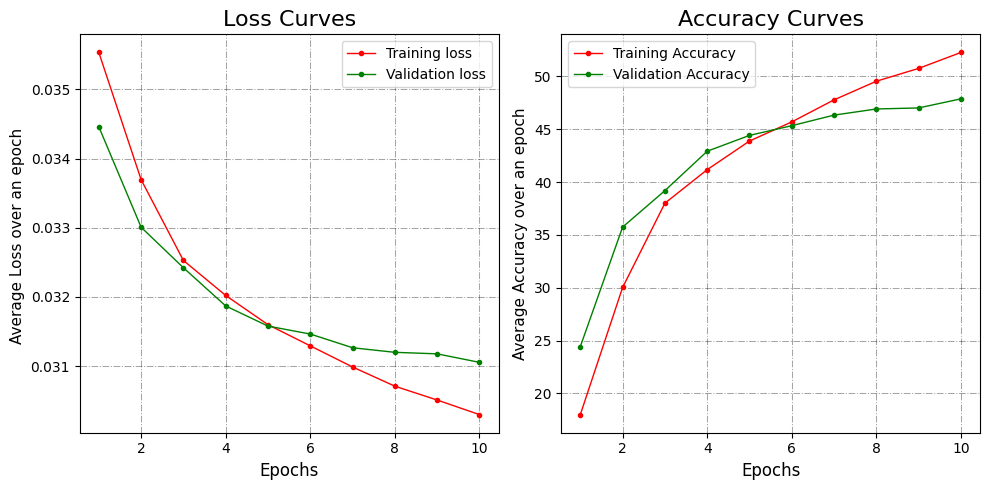

In [6]:
# train for 10 epochs
t_loss10, t_acc10, v_loss10, v_acc10 = training(model, loss_func, optimizer, trainloader,testloader, epochs=10)
plot_training_loss_and_accuracy(t_loss10, t_acc10, v_loss10, v_acc10)

### Comments:
- The training works. And the parameters are getting updated.

- This is evident from the fact that the training loss (averaged over every epoch) is getting reduced.
- And the training accuracy also increases in the subsequent epochs.
- In total there are 50000/64 = 780 mini batches in 1 epoch.

## Hyperparameter tuning

Finished Training


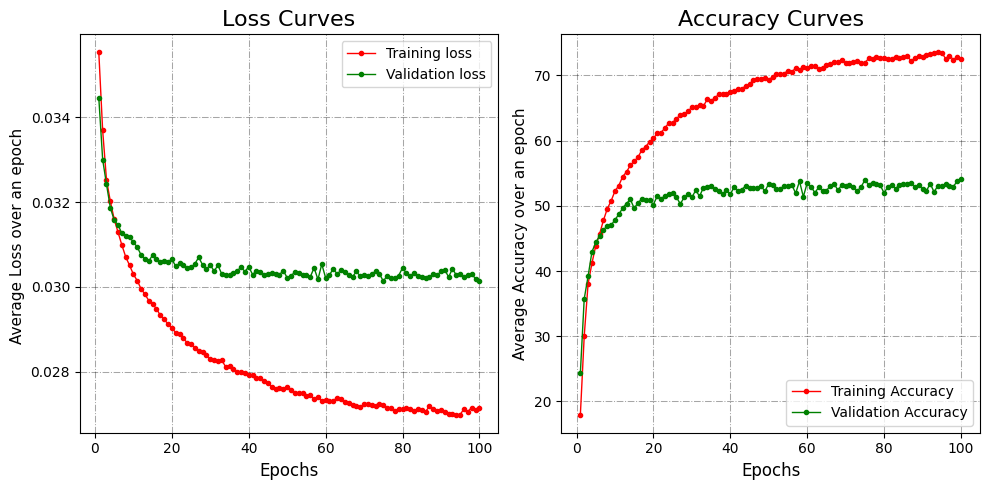

In [5]:
t_loss100, t_acc100, v_loss100, v_acc100 = training(model, loss_func, optimizer, trainloader,testloader, epochs=100)
plot_training_loss_and_accuracy(t_loss100, t_acc100, v_loss100, v_acc100)

Finished Training


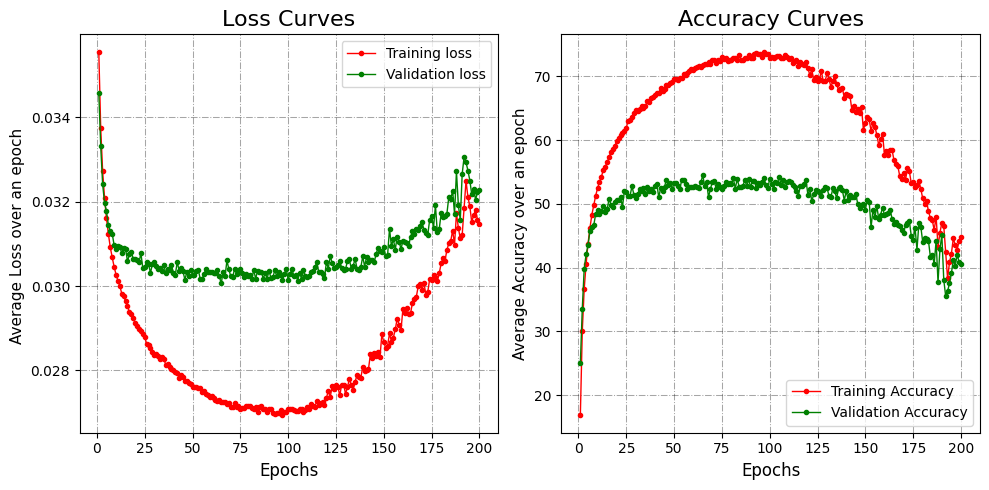

In [9]:
t_loss200, t_acc200, v_loss200, v_acc200 = training(model, loss_func, optimizer, trainloader,testloader, epochs=200)
plot_training_loss_and_accuracy(t_loss200, t_acc200, v_loss200, v_acc200)

Finished Training


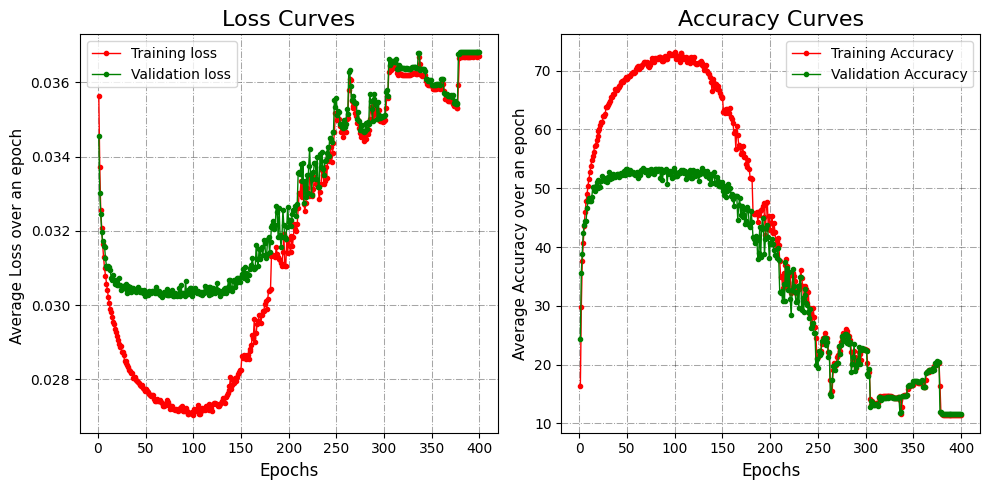

In [ ]:
t_loss400, t_acc400, v_loss400, v_acc400 = training(model, loss_func, optimizer, trainloader,testloader, epochs=400)
plot_training_loss_and_accuracy(t_loss400, t_acc400, v_loss400, v_acc400)

### Comment
- Around 100th epochs is the minimum from the graphs above using SGD with momentum = 0.9 and learning rate = 0.01.

- After 100 epochs the model shows evidence of overfitting at first.
- Later the gradients are exploding this is visible from the plot.

In [11]:
# Average accuracy at after 100 epochs of traaining in the test set
print(f'Training accuracy after 100 epochs : {t_acc100[99]:.3f}%')
print(f'Validation accuracy after 100 epochs : {v_acc100[99]:.3f}%')

Training accuracy after 100 epochs : 72.474%
Validation accuracy after 100 epochs : 54.060%


### Comment
- Without regularization the model accuracy in validation set is moderate. 

- The accuracy is approximately 5 times better than a random guess (10% accuracy since 10 prediction classes).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7411765..0.8352941].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75686276..0.7254902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..1.0].


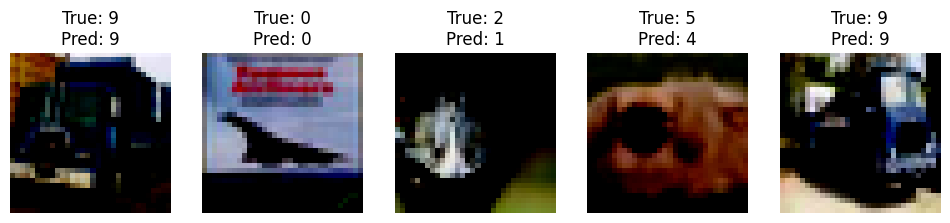

In [9]:
import random
import matplotlib.pyplot as plt

## Function to display random test images with true and predicted indices
def display_predictions_with_indices(model, testloader, num_images=5):
    model.eval()  # Set the model to evaluation mode
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    # Get predictions
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    # Randomly select num_images to display
    indices = random.sample(range(len(images)), num_images)
    selected_images = images[indices]
    selected_labels = labels[indices]
    selected_preds = preds[indices]

    # Plot images with indices
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        img = selected_images[i].permute(1, 2, 0).cpu().numpy()  # Convert from tensor
        plt.imshow(img)
        plt.title(f'True: {selected_labels[i].item()}\nPred: {selected_preds[i].item()}')
        plt.axis('off')
    
    plt.show()

# Example usage
display_predictions_with_indices(model, testloader)


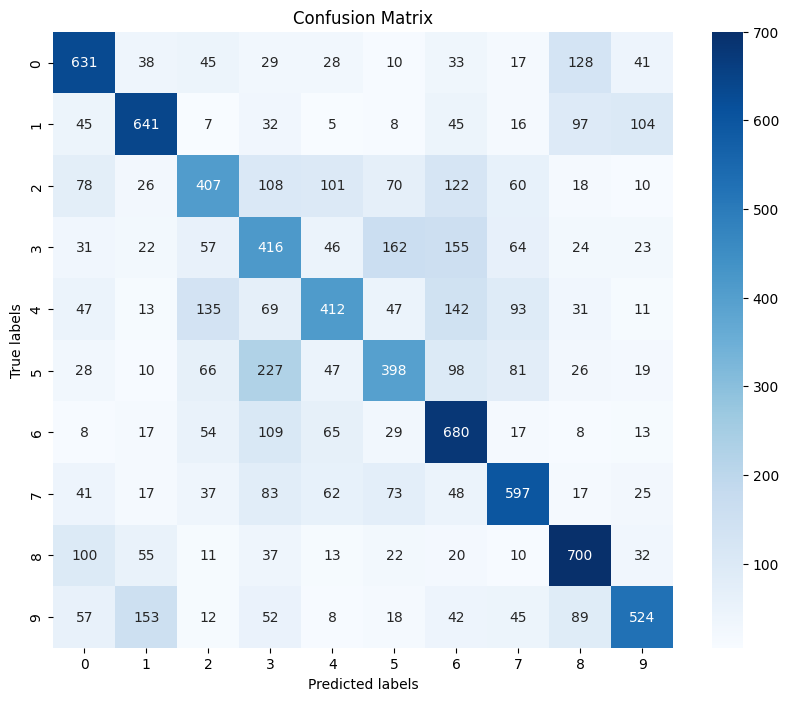

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to compute and plot the confusion matrix
def plot_confusion_matrix(model, testloader, num_classes=10):
    model.eval()  # Set the model to evaluation mode

    # Collect all true and predicted labels
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
plot_confusion_matrix(model, testloader)
